<a href="https://colab.research.google.com/github/jcorner1/MMH_Project/blob/main/Load_Sat_Images_Subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Satellite Imagery Subset Files

In [2]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

import os
os.listdir("/content/drive/My Drive/Colab Notebooks/subsets/tiles")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ortho_1-1_hc_s_al127_2023_12.tfw',
 'ortho_1-1_hc_s_al127_2023_11.tfw',
 'ortho_1-1_hc_s_al127_2023_10.tfw',
 'ortho_1-1_hc_s_al127_2023_13.tfw',
 'ortho_1-1_hc_s_al127_2023_12.TIF.ovr',
 'ortho_1-1_hc_s_al127_2023_10.TIF.ovr',
 'ortho_1-1_hc_s_al127_2023_12.TIF',
 'ortho_1-1_hc_s_al127_2023_13.TIF',
 'ortho_1-1_hc_s_al127_2023_11.TIF',
 'ortho_1-1_hc_s_al127_2023_11.TIF.ovr',
 'ortho_1-1_hc_s_al127_2023_13.TIF.ovr',
 'ortho_1-1_hc_s_al127_2023_10.TIF',
 'ortho_1-1_hc_s_al127_2023_13.TIF.aux.xml',
 'ortho_1-1_hc_s_al127_2023_12.TIF.aux.xml',
 'ortho_1-1_hc_s_al127_2023_10.TIF.aux.xml',
 'ortho_1-1_hc_s_al127_2023_11.TIF.aux.xml']

## Load a Sat Image

In [9]:
from osgeo import gdal
gdal.UseExceptions()

# open the .sid file
dataset = gdal.Open(r'/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_10.TIF')

# get the first raster band
band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)

# read the data as a numpy array
data1 = band1.ReadAsArray()
data2 = band2.ReadAsArray()
data3 = band3.ReadAsArray()


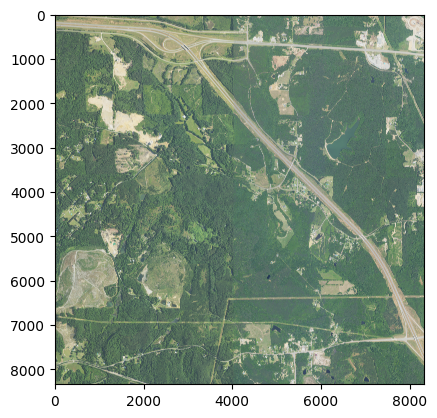

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# create a color image using the 3 RGB bands
color_image10 = np.dstack((data1, data2, data3))

# display the color image
plt.imshow(color_image10)
plt.show()


## Load the Other Files

In [12]:
import glob

tifs = glob.glob(r'/content/drive/My Drive/Colab Notebooks/subsets/tiles/*.TIF')
tifs.sort()
tifs = tifs[1:]
tifs

['/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_11.TIF',
 '/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_12.TIF',
 '/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_13.TIF']

In [21]:
for tif in range(len(tifs)):
  print(tifs[tif])
  dataset = gdal.Open(tifs[tif])

  for band in range(1, dataset.RasterCount + 1):
    locals()[f'band{band}_{tifs[tif][-6:-4]}'] = dataset.GetRasterBand(band)
    locals()[f'data{band}'] = locals()[f'band{band}_{tifs[tif][-6:-4]}'].ReadAsArray()

  locals()[f'color_image{tifs[tif][-6:-4]}'] = np.dstack((data1, data2, data3))

/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_11.TIF
/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_12.TIF
/content/drive/My Drive/Colab Notebooks/subsets/tiles/ortho_1-1_hc_s_al127_2023_13.TIF


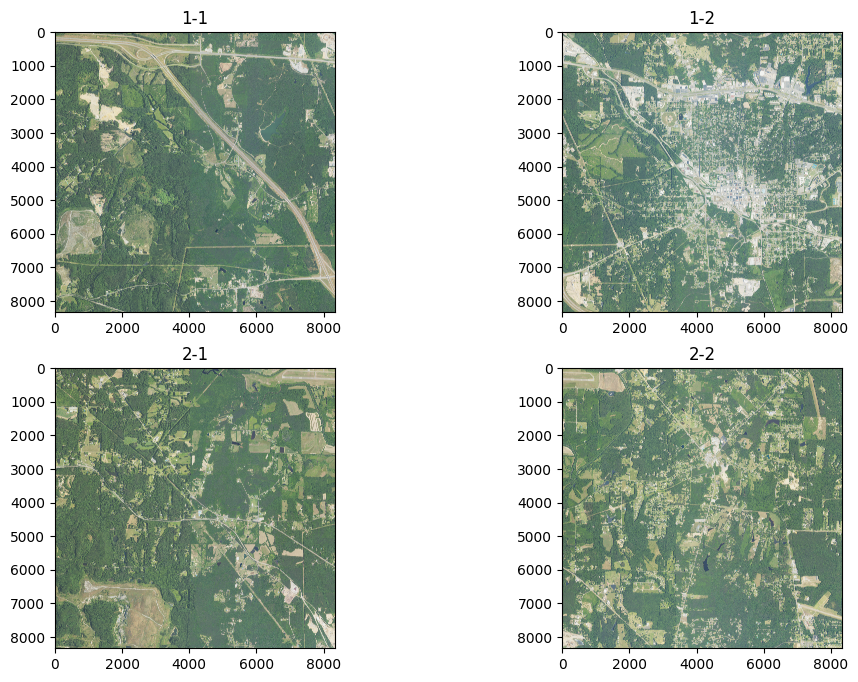

In [22]:
# prompt: make a 4 plot multipanel image from the color image variables

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(color_image10)
axes[0, 0].set_title('1-1')
axes[0, 1].imshow(color_image11)
axes[0, 1].set_title('1-2')
axes[1, 0].imshow(color_image12)
axes[1, 0].set_title('2-1')
axes[1, 1].imshow(color_image13)
axes[1, 1].set_title('2-2')

plt.show()
